# The Meselson-Stahl Experiment

## Introduction

I first learned about the Meselson-Stahl experiment when I was reading my textbook for introductory biology class. It was the coolest experiment I learned about, and it has been my favorite since then. What is so cool about this experiment? Let's dive in!

Nowadays, we know that DNA is the heritable material, but many scientists debated whether protein was the genetic material in the 1940s. Because DNA only had four kinds of nucleotides compared to twenty different amino acids in proteins, many believed DNA lacked the complexity necessary to store genetic information.[^1] After the Avery-MacLeod-McCarty experiment[^2] and Hershey-Chase experiment[^3], published in 1944 and 1952 respectively, scientists accepted DNA as the genetic material. Then in 1953, James Watson and Francis Crick proposed a model for the structure of DNA as a double helix based on Rosalind Franklin's X-ray diffraction data.[^4] The next question scientists wanted to answer was: how does DNA replicate?

## The Three Competing Theories

By the mid-1950s, scientists had three different ideas about how DNA might copy itself.[^5] It's fascinating to think that even after Watson and Crick proposed the double helix structure, nobody actually knew how it worked! The three theories had pretty descriptive names that tell you exactly what each one predicted.

The **semi-conservative model** was Watson and Crick's original idea. They thought the two DNA strands would separate, like unzipping a zipper, and each strand would serve as a template to build a new partner strand.[^6] So after replication, you'd have two DNA molecules, each containing one old strand and one new strand. It is "semi-conservative" because half of the original DNA is conserved in each copy.

The **conservative model** suggested something completely different. Scientists who supported this idea thought the original DNA double helix would stay completely intact, somehow producing an entirely separate copy.[^7] The original stays unchanged while you get a brand new copy like a photo copy.

But then there was the **dispersive model**, which was proposed by Max Delbrück. Delbrück was actually skeptical of Watson and Crick's idea because he thought it was physically impossible to separate the tightly wound DNA strands.[^8] DNA is like coiled ropes that are wound together millions of times. So he proposed that the DNA would break into small pieces, replicate those pieces, and then reassemble them.[^9] The result would be two DNA molecules that were each a patchwork mix of old and new material scattered throughout.

What made this debate so intense was that all three theories seemed plausible, but nobody had figured out how to test them experimentally.[^10] That's where Meselson and Stahl came in with their amazing solution.

Here is a diagram of the three models of DNA replications. 

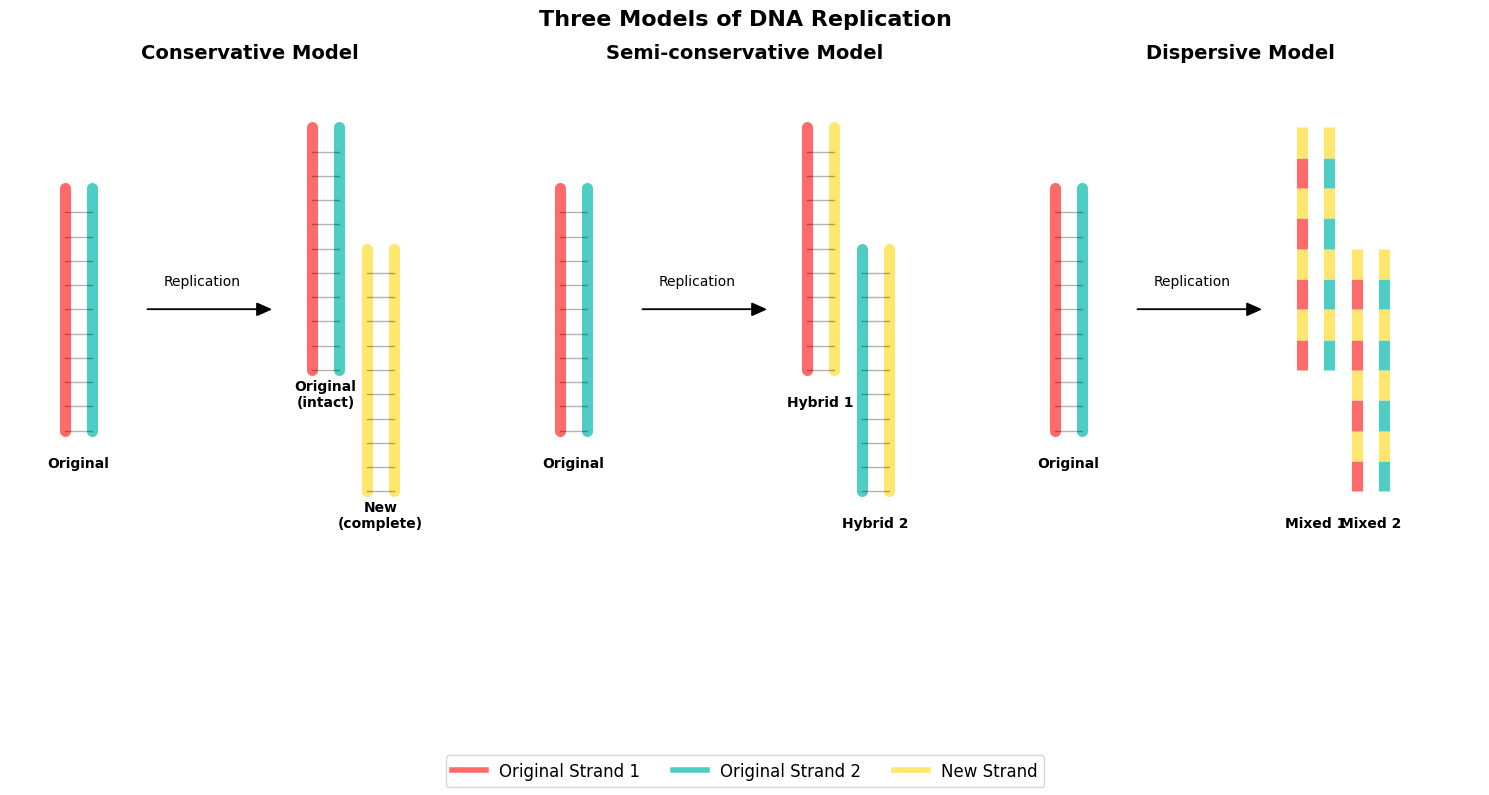

In [ ]:
#| echo: false

import matplotlib.pyplot as plt, numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15, 8))
fig.suptitle('Three Models of DNA Replication', fontsize=16, fontweight='bold')

color_old1, color_old2, color_new = '#FF6B6B', '#4ECDC4', '#FFE66D'

def draw_dna_helix(ax, x, y, height, color1, color2, label=""): 
    ax.plot([x-0.1, x-0.1], [y, y+height], color=color1, linewidth=8, solid_capstyle='round')
    ax.plot([x+0.1, x+0.1], [y, y+height], color=color2, linewidth=8, solid_capstyle='round')
    for i in range(0, int(height*10), 2): 
        y_pos = y + i/10
        if y_pos < y + height: ax.plot([x-0.1, x+0.1], [y_pos, y_pos], 'k-', linewidth=1, alpha=0.3)
    if label: ax.text(x, y-0.3, label, ha='center', fontsize=10, fontweight='bold')

ax1 = axes[0]
ax1.set_title('Conservative Model', fontsize=14, fontweight='bold')
draw_dna_helix(ax1, 0, 2, 2, color_old1, color_old2, "Original")
ax1.arrow(0.5, 3, 0.8, 0, head_width=0.1, head_length=0.1, fc='black', ec='black')
ax1.text(0.9, 3.2, 'Replication', ha='center', fontsize=10)
draw_dna_helix(ax1, 1.8, 2.5, 2, color_old1, color_old2, "Original\n(intact)")
draw_dna_helix(ax1, 2.2, 1.5, 2, color_new, color_new, "New\n(complete)")
ax1.set_xlim(-0.5, 3), ax1.set_ylim(0, 5), ax1.axis('off')

ax2 = axes[1]
ax2.set_title('Semi-conservative Model', fontsize=14, fontweight='bold')
draw_dna_helix(ax2, 0, 2, 2, color_old1, color_old2, "Original")
ax2.arrow(0.5, 3, 0.8, 0, head_width=0.1, head_length=0.1, fc='black', ec='black')
ax2.text(0.9, 3.2, 'Replication', ha='center', fontsize=10)
draw_dna_helix(ax2, 1.8, 2.5, 2, color_old1, color_new, "Hybrid 1")
draw_dna_helix(ax2, 2.2, 1.5, 2, color_old2, color_new, "Hybrid 2")
ax2.set_xlim(-0.5, 3), ax2.set_ylim(0, 5), ax2.axis('off')

ax3 = axes[2]
ax3.set_title('Dispersive Model', fontsize=14, fontweight='bold')
draw_dna_helix(ax3, 0, 2, 2, color_old1, color_old2, "Original")
ax3.arrow(0.5, 3, 0.8, 0, head_width=0.1, head_length=0.1, fc='black', ec='black')
ax3.text(0.9, 3.2, 'Replication', ha='center', fontsize=10)

for i, y_start in enumerate([2.5, 1.5]):
    x_pos = 1.8 + i*0.4
    segments = 8
    segment_height = 2/segments
    for j in range(segments):
        y_pos = y_start + j*segment_height
        color1, color2 = (color_old1, color_old2) if j % 2 == 0 else (color_new, color_new)
        ax3.plot([x_pos-0.1, x_pos-0.1], [y_pos, y_pos+segment_height], color=color1, linewidth=8, solid_capstyle='butt')
        ax3.plot([x_pos+0.1, x_pos+0.1], [y_pos, y_pos+segment_height], color=color2, linewidth=8, solid_capstyle='butt')

ax3.text(1.8, 1.2, "Mixed 1", ha='center', fontsize=10, fontweight='bold')
ax3.text(2.2, 1.2, "Mixed 2", ha='center', fontsize=10, fontweight='bold')
ax3.set_xlim(-0.5, 3), ax3.set_ylim(0, 5), ax3.axis('off')

legend_elements = [plt.Line2D([0], [0], color=c, lw=4, label=l) for c,l in [(color_old1, 'Original Strand 1'), (color_old2, 'Original Strand 2'), (color_new, 'New Strand')]]
fig.legend(handles=legend_elements, loc='lower center', ncol=3, fontsize=12)
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.show()

Before moving onto experimental details, let's think about what each model would look like after multiple replications. In semi-conservative, DNA opens up and each strand of heavy DNA is used as a template and creates hybrid DNA with half heavy and half light on generation 1. After second replication, we have two hybrids and two lights.

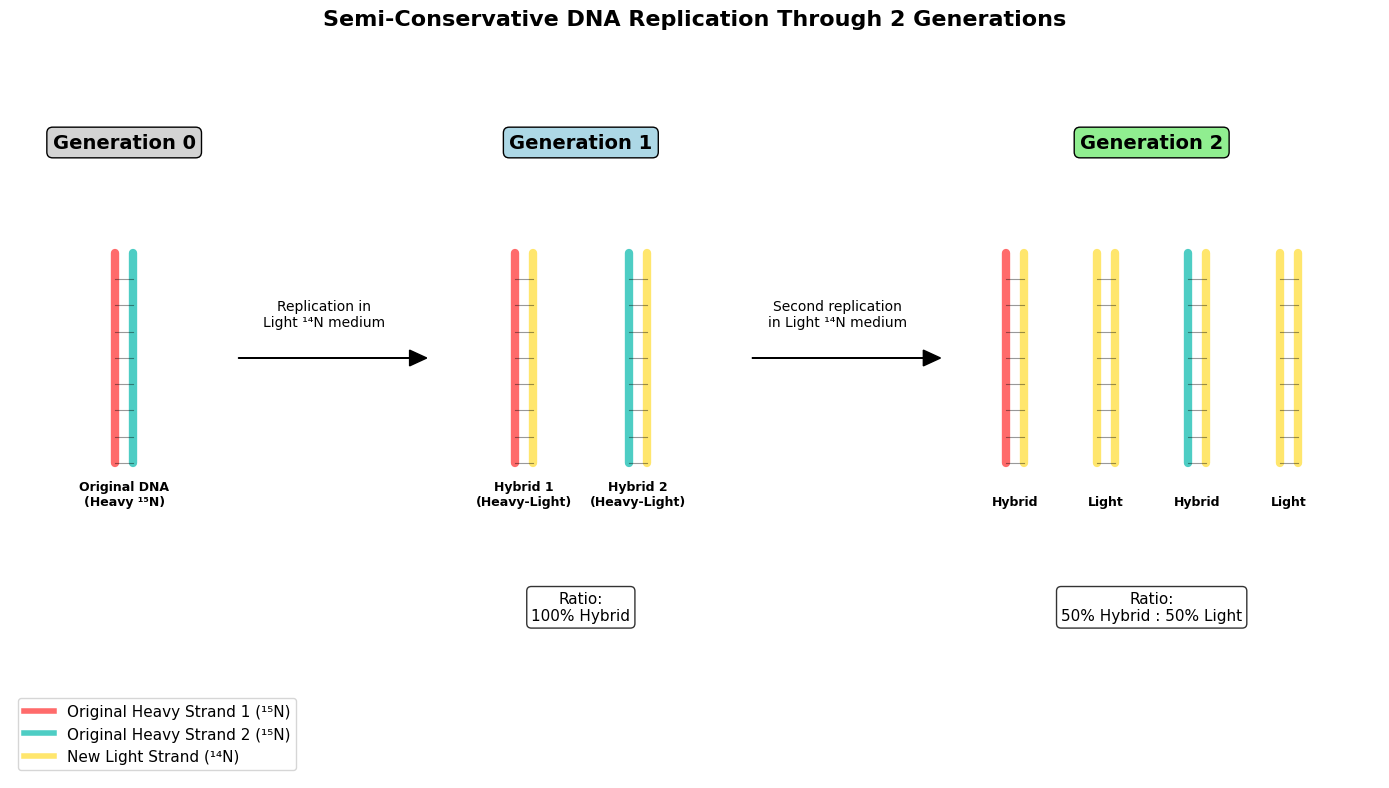

In [ ]:
#| echo: false

fig, ax = plt.subplots(1, 1, figsize=(14, 8))
fig.suptitle('Semi-Conservative DNA Replication Through 2 Generations', fontsize=16, fontweight='bold')

color_old1, color_old2, color_new = '#FF6B6B', '#4ECDC4', '#FFE66D'

def draw_dna_helix(ax, x, y, height, color1, color2, label="", label_offset=-0.4):
    ax.plot([x-0.08, x-0.08], [y, y+height], color=color1, linewidth=6, solid_capstyle='round')
    ax.plot([x+0.08, x+0.08], [y, y+height], color=color2, linewidth=6, solid_capstyle='round')
    for i in range(0, int(height*8), 2):
        y_pos = y + i/8
        if y_pos < y + height: ax.plot([x-0.08, x+0.08], [y_pos, y_pos], 'k-', linewidth=0.8, alpha=0.4)
    if label: ax.text(x, y+label_offset, label, ha='center', fontsize=9, fontweight='bold')

ax.text(1, 9, 'Generation 0', ha='center', fontsize=14, fontweight='bold', bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgray'))
draw_dna_helix(ax, 1, 6, 2, color_old1, color_old2, "Original DNA\n(Heavy ¹⁵N)")

ax.arrow(2, 7, 1.5, 0, head_width=0.15, head_length=0.15, fc='black', ec='black')
ax.text(2.75, 7.3, 'Replication in\nLight ¹⁴N medium', ha='center', fontsize=10)

ax.text(5, 9, 'Generation 1', ha='center', fontsize=14, fontweight='bold', bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue'))
draw_dna_helix(ax, 4.5, 6, 2, color_old1, color_new, "Hybrid 1\n(Heavy-Light)")
draw_dna_helix(ax, 5.5, 6, 2, color_old2, color_new, "Hybrid 2\n(Heavy-Light)")

ax.arrow(6.5, 7, 1.5, 0, head_width=0.15, head_length=0.15, fc='black', ec='black')
ax.text(7.25, 7.3, 'Second replication\nin Light ¹⁴N medium', ha='center', fontsize=10)

ax.text(10, 9, 'Generation 2', ha='center', fontsize=14, fontweight='bold', bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgreen'))
x_positions, labels = [8.8, 9.6, 10.4, 11.2], ["Hybrid", "Light", "Hybrid", "Light"]
colors = [(color_old1, color_new), (color_new, color_new), (color_old2, color_new), (color_new, color_new)]

for x_pos, label, (c1, c2) in zip(x_positions, labels, colors): draw_dna_helix(ax, x_pos, 6, 2, c1, c2, label)

ax.text(5, 4.5, 'Ratio:\n100% Hybrid', ha='center', fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))
ax.text(10, 4.5, 'Ratio:\n50% Hybrid : 50% Light', ha='center', fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

legend_elements = [plt.Line2D([0], [0], color=c, lw=4, label=l) for c,l in [(color_old1, 'Original Heavy Strand 1 (¹⁵N)'), (color_old2, 'Original Heavy Strand 2 (¹⁵N)'), (color_new, 'New Light Strand (¹⁴N)')]]
ax.legend(handles=legend_elements, loc='lower left', fontsize=11)
ax.set_xlim(0, 12), ax.set_ylim(3, 10), ax.axis('off')
plt.tight_layout()
plt.show()

What would happen in conservative replication? Since the original DNA remains intact and copy is made like using a copy machine, we have a heavy one and a light one. We do not have a hybrid copy here. In the generation 2, we have 2 more light copies of the DNA.

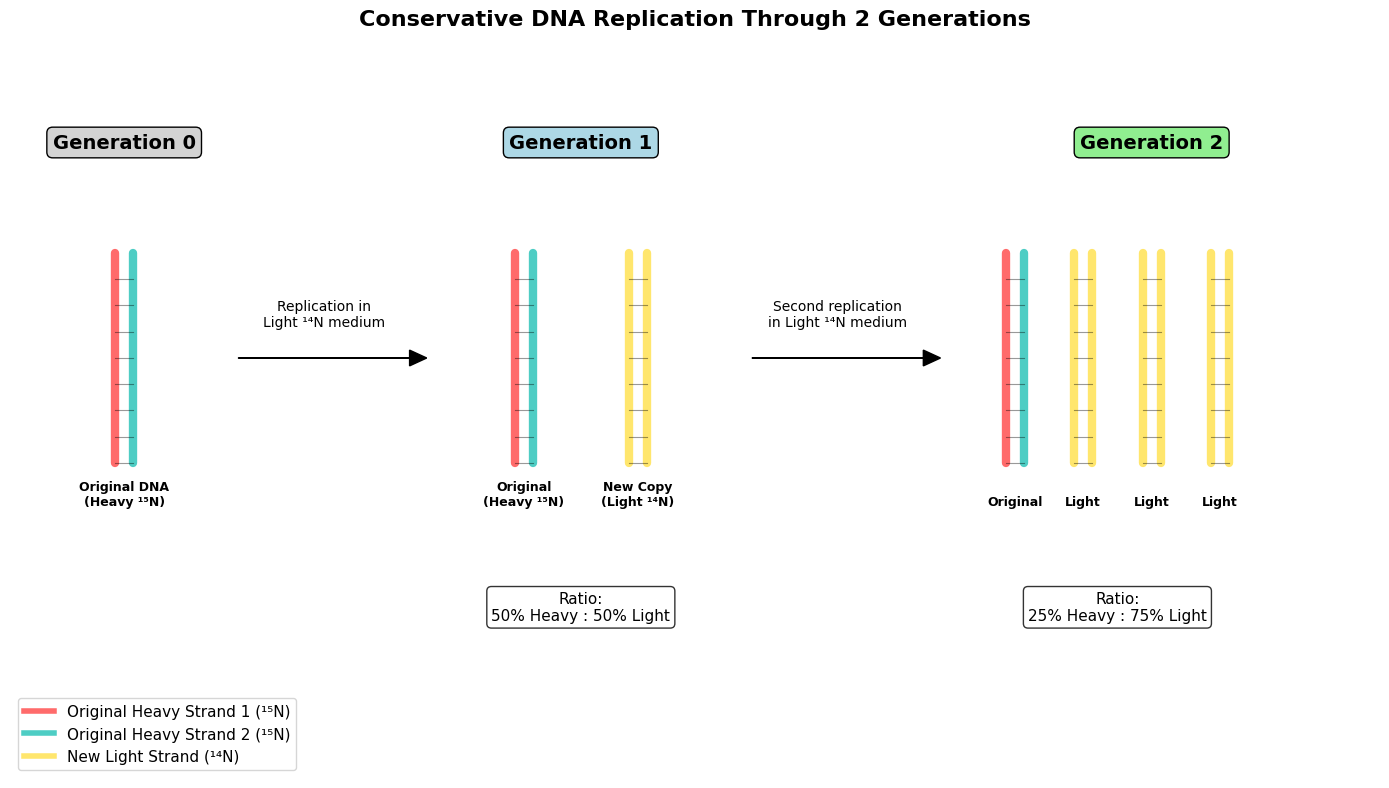

In [ ]:
#| echo: false

fig, ax = plt.subplots(1, 1, figsize=(14, 8))
fig.suptitle('Conservative DNA Replication Through 2 Generations', fontsize=16, fontweight='bold')

color_old1, color_old2, color_new = '#FF6B6B', '#4ECDC4', '#FFE66D'

def draw_dna_helix(ax, x, y, height, color1, color2, label="", label_offset=-0.4):
    ax.plot([x-0.08, x-0.08], [y, y+height], color=color1, linewidth=6, solid_capstyle='round')
    ax.plot([x+0.08, x+0.08], [y, y+height], color=color2, linewidth=6, solid_capstyle='round')
    for i in range(0, int(height*8), 2):
        y_pos = y + i/8
        if y_pos < y + height: ax.plot([x-0.08, x+0.08], [y_pos, y_pos], 'k-', linewidth=0.8, alpha=0.4)
    if label: ax.text(x, y+label_offset, label, ha='center', fontsize=9, fontweight='bold')

ax.text(1, 9, 'Generation 0', ha='center', fontsize=14, fontweight='bold', bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgray'))
draw_dna_helix(ax, 1, 6, 2, color_old1, color_old2, "Original DNA\n(Heavy ¹⁵N)")

ax.arrow(2, 7, 1.5, 0, head_width=0.15, head_length=0.15, fc='black', ec='black')
ax.text(2.75, 7.3, 'Replication in\nLight ¹⁴N medium', ha='center', fontsize=10)

ax.text(5, 9, 'Generation 1', ha='center', fontsize=14, fontweight='bold', bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue'))
draw_dna_helix(ax, 4.5, 6, 2, color_old1, color_old2, "Original\n(Heavy ¹⁵N)")
draw_dna_helix(ax, 5.5, 6, 2, color_new, color_new, "New Copy\n(Light ¹⁴N)")

ax.arrow(6.5, 7, 1.5, 0, head_width=0.15, head_length=0.15, fc='black', ec='black')
ax.text(7.25, 7.3, 'Second replication\nin Light ¹⁴N medium', ha='center', fontsize=10)

ax.text(10, 9, 'Generation 2', ha='center', fontsize=14, fontweight='bold', bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgreen'))
x_positions, labels = [8.8, 9.4, 10.0, 10.6], ["Original", "Light", "Light", "Light"]
colors = [(color_old1, color_old2), (color_new, color_new), (color_new, color_new), (color_new, color_new)]

for x_pos, label, (c1, c2) in zip(x_positions, labels, colors): draw_dna_helix(ax, x_pos, 6, 2, c1, c2, label)

ax.text(5, 4.5, 'Ratio:\n50% Heavy : 50% Light', ha='center', fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))
ax.text(9.7, 4.5, 'Ratio:\n25% Heavy : 75% Light', ha='center', fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

legend_elements = [plt.Line2D([0], [0], color=c, lw=4, label=l) for c,l in [(color_old1, 'Original Heavy Strand 1 (¹⁵N)'), (color_old2, 'Original Heavy Strand 2 (¹⁵N)'), (color_new, 'New Light Strand (¹⁴N)')]]
ax.legend(handles=legend_elements, loc='lower left', fontsize=11)
ax.set_xlim(0, 12), ax.set_ylim(3, 10), ax.axis('off')
plt.tight_layout()
plt.show()

In dispersive DNA replication, DNA is chopped up into little pieces but they still remain as double strand. In generation 1, random pieces of DNA are replaced with light ones. Therefore, we have 50% heavy and 50% light hybrids in generation 1. And in generation 2, we have 25% heavy with 75% light as hybrids.

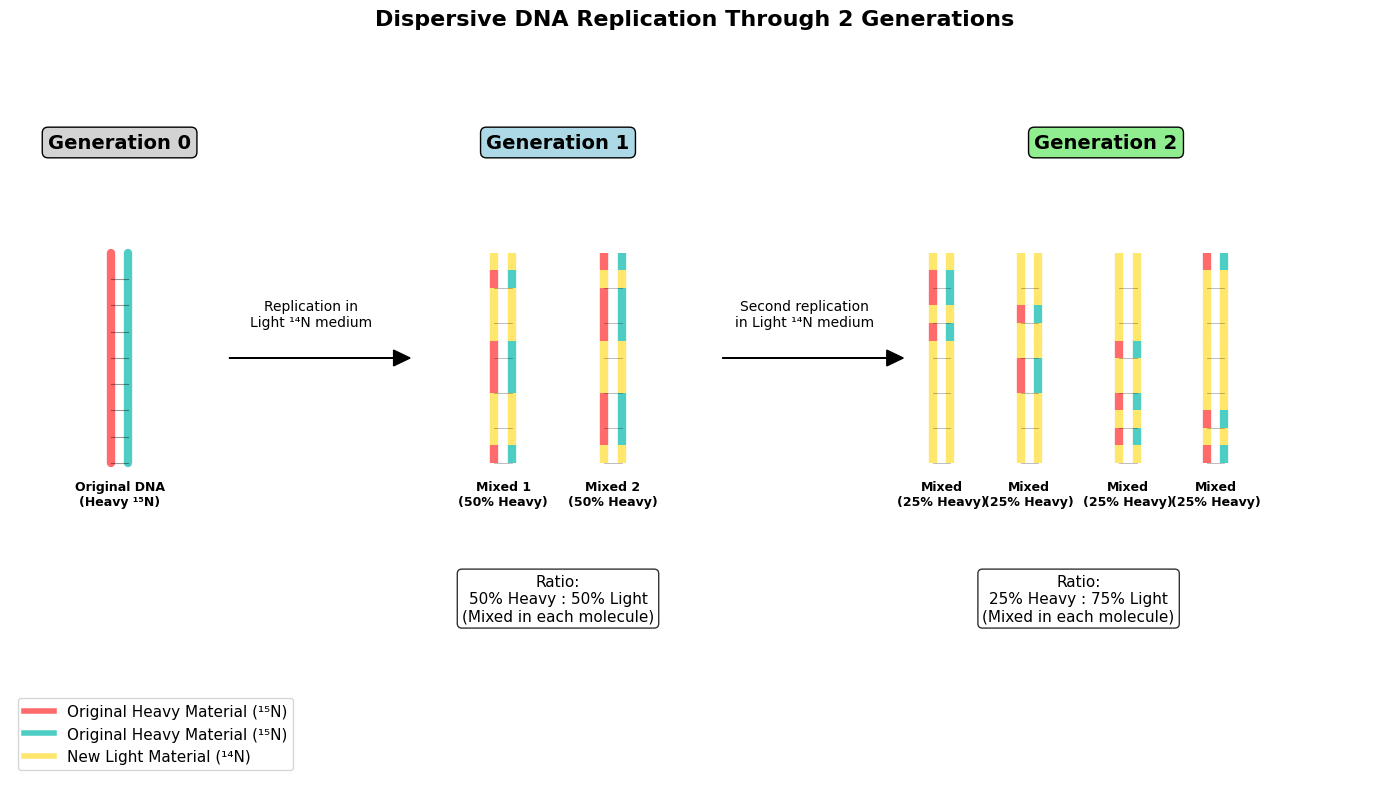

In [ ]:
#| echo: false

fig, ax = plt.subplots(1, 1, figsize=(14, 8))
fig.suptitle('Dispersive DNA Replication Through 2 Generations', fontsize=16, fontweight='bold')

color_old1, color_old2, color_new = '#FF6B6B', '#4ECDC4', '#FFE66D'

def draw_dispersive_helix(ax, x, y, height, pattern, label="", label_offset=-0.4):
    segments, segment_height = 12, height / 12
    
    for i in range(segments):
        y_pos = y + i * segment_height
        is_heavy = pattern[i]
        
        if is_heavy:
            ax.plot([x-0.08, x-0.08], [y_pos, y_pos+segment_height], color=color_old1, linewidth=6, solid_capstyle='butt')
            ax.plot([x+0.08, x+0.08], [y_pos, y_pos+segment_height], color=color_old2, linewidth=6, solid_capstyle='butt')
        else:
            ax.plot([x-0.08, x-0.08], [y_pos, y_pos+segment_height], color=color_new, linewidth=6, solid_capstyle='butt')
            ax.plot([x+0.08, x+0.08], [y_pos, y_pos+segment_height], color=color_new, linewidth=6, solid_capstyle='butt')
    
    for i in range(0, int(height*6), 2):
        y_pos = y + i/6
        if y_pos < y + height: ax.plot([x-0.08, x+0.08], [y_pos, y_pos], 'k-', linewidth=0.6, alpha=0.3)
    
    if label: ax.text(x, y+label_offset, label, ha='center', fontsize=9, fontweight='bold')

def draw_dna_helix(ax, x, y, height, color1, color2, label="", label_offset=-0.4):
    ax.plot([x-0.08, x-0.08], [y, y+height], color=color1, linewidth=6, solid_capstyle='round')
    ax.plot([x+0.08, x+0.08], [y, y+height], color=color2, linewidth=6, solid_capstyle='round')
    for i in range(0, int(height*8), 2):
        y_pos = y + i/8
        if y_pos < y + height: ax.plot([x-0.08, x+0.08], [y_pos, y_pos], 'k-', linewidth=0.8, alpha=0.4)
    if label: ax.text(x, y+label_offset, label, ha='center', fontsize=9, fontweight='bold')

ax.text(1, 9, 'Generation 0', ha='center', fontsize=14, fontweight='bold', bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgray'))
draw_dna_helix(ax, 1, 6, 2, color_old1, color_old2, "Original DNA\n(Heavy ¹⁵N)")

ax.arrow(2, 7, 1.5, 0, head_width=0.15, head_length=0.15, fc='black', ec='black')
ax.text(2.75, 7.3, 'Replication in\nLight ¹⁴N medium', ha='center', fontsize=10)

ax.text(5, 9, 'Generation 1', ha='center', fontsize=14, fontweight='bold', bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue'))
np.random.seed(42)
pattern1 = [np.random.random() < 0.5 for _ in range(12)]
pattern2 = [not p for p in pattern1]
draw_dispersive_helix(ax, 4.5, 6, 2, pattern1, "Mixed 1\n(50% Heavy)")
draw_dispersive_helix(ax, 5.5, 6, 2, pattern2, "Mixed 2\n(50% Heavy)")

ax.arrow(6.5, 7, 1.5, 0, head_width=0.15, head_length=0.15, fc='black', ec='black')
ax.text(7.25, 7.3, 'Second replication\nin Light ¹⁴N medium', ha='center', fontsize=10)

ax.text(10, 9, 'Generation 2', ha='center', fontsize=14, fontweight='bold', bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgreen'))

patterns_g2 = [[False]*12 for _ in range(4)]
heavy_positions = [(i, 0) for i in range(12) if pattern1[i]] + [(i, 1) for i in range(12) if pattern2[i]]
np.random.shuffle(heavy_positions)

for idx, (pos, source) in enumerate(heavy_positions):
    dna_index = idx % 4
    patterns_g2[dna_index][pos] = True

draw_dispersive_helix(ax, 8.5, 6, 2, patterns_g2[0], "Mixed\n(25% Heavy)")
draw_dispersive_helix(ax, 9.3, 6, 2, patterns_g2[1], "Mixed\n(25% Heavy)")
draw_dispersive_helix(ax, 10.2, 6, 2, patterns_g2[2], "Mixed\n(25% Heavy)")
draw_dispersive_helix(ax, 11.0, 6, 2, patterns_g2[3], "Mixed\n(25% Heavy)")

ax.text(5, 4.5, 'Ratio:\n50% Heavy : 50% Light\n(Mixed in each molecule)', ha='center', fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))
ax.text(9.75, 4.5, 'Ratio:\n25% Heavy : 75% Light\n(Mixed in each molecule)', ha='center', fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

legend_elements = [plt.Line2D([0], [0], color=c, lw=4, label=l) for c,l in [(color_old1, 'Original Heavy Material (¹⁵N)'), (color_old2, 'Original Heavy Material (¹⁵N)'), (color_new, 'New Light Material (¹⁴N)')]]
ax.legend(handles=legend_elements, loc='lower left', fontsize=11)
ax.set_xlim(0, 12.5), ax.set_ylim(3, 10), ax.axis('off')
plt.tight_layout()
plt.show()

## The Brilliant Experimental Design

So how do you actually test which theory is correct? This was the challenge that stumped scientists for years. Meselson and Stahl came up with an incredibly clever solution that's honestly kind of beautiful in its simplicity.

Their big insight was to use isotopes to "label" DNA so they could track it. They chose nitrogen isotopes because DNA contains lots of nitrogen atoms.[^6] Most nitrogen in nature is the light version (¹⁴N), but there's also a heavier version (¹⁵N) that works exactly the same way but weighs more. It's like having two identical cars where one is made of regular steel and the other is made of slightly heavier steel. They both work the same, but you can tell them apart if you weigh them.

Why nitrogen instead of other elements? Well, other scientists had actually tried using phosphorus first. But phosphorus-32 was radioactive and decayed too quickly, so it didn't work well for this kind of experiment.[^8] Nitrogen was perfect because it's stable and DNA is packed with nitrogen atoms.

Next, they needed to separate heavy DNA from light DNA. This is where Meselson's genius really shows. He had attended a lecture by Jacques Monod about protein synthesis, and during that talk, he had this lightbulb moment about using density differences to separate molecules.[^11] The technique he developed is called density gradient centrifugation.

Here's how it works: you mix your DNA sample with a really dense salt solution made of cesium chloride (CsCl). When you spin this mixture in an ultracentrifuge at incredibly high speeds for hours, something amazing happens. The cesium chloride naturally forms a gradient from heavy at the bottom to light at the top.[^12] The DNA then settles at the exact spot in the tube where its density matches the cesium chloride around it. Heavy DNA sinks further down, light DNA floats higher up.

Why cesium chloride specifically? They actually tried other salts first! They looked at the periodic table for dense atoms that wouldn't react with DNA. They tried rubidium chloride first, but even concentrated solutions weren't dense enough to make DNA float. So they moved down the periodic table to cesium, and that worked perfectly.[^12]

For the organisms, they initially tried bacteriophages (viruses that infect bacteria), but ran into problems. The viral DNA broke apart during centrifugation and replicated too fast to measure properly. So they switched to E. coli bacteria, whose DNA formed much clearer, more stable bands in the centrifuge.[^7]

The experimental plan was elegant: grow bacteria for many generations in heavy nitrogen medium so all their DNA becomes heavy, then suddenly switch them to light nitrogen medium and watch what happens to the DNA after each round of replication.

## The Results That Changed Everything

So what did they actually see? The results were so clean and definitive that they immediately settled the debate that had been going on for years.

First, let me set up what each theory predicted would happen. If the conservative model was right, after one generation in light nitrogen, you'd see two distinct bands: one heavy band (the original DNA staying intact) and one light band (the completely new copy). If the semi-conservative model was correct, you'd see just one band at an intermediate density (hybrid DNA with one heavy and one light strand). And if the dispersive model was right, you'd also see one intermediate band, but for a different reason (mixed heavy and light material throughout each molecule).

Here's what they actually observed:

Generation 0 (the control): All the DNA was heavy, forming a single band at the bottom of the cesium chloride gradient.[^7] This made sense because the bacteria had been growing in heavy nitrogen for many generations.

Generation 1 (after one replication in light medium): This was the moment of truth. They saw a single band, but it wasn't at the heavy position or the light position. It was right in the middle at an intermediate density![^12] This immediately ruled out the conservative model. If DNA replication were conservative, they would have seen two separate bands, not one intermediate band.

But here's the thing: both the semi-conservative and dispersive models predicted this same result. So they needed to look at the second generation to figure out which one was correct.

Generation 2 (after two replications in light medium): This is where it got really exciting. Instead of one band, they now saw two distinct bands. One band was at the same intermediate position as generation 1, and the other was at the light position.[^9] Plus, the two bands were exactly equal in intensity, meaning there were equal amounts of each type of DNA.

This result was completely inconsistent with the dispersive model, which would have predicted just one band at a density between the intermediate and light positions.[^9] But it perfectly matched what the semi-conservative model predicted: half the DNA molecules would still be hybrids (intermediate density) and half would be completely light.

DNA replication is semi-conservative, just like Watson and Crick had proposed.

The beauty of this experiment is how definitive the results were. There was no ambiguity, no need for statistical analysis or complex interpretation. The bands in the centrifuge tube told the whole story.

![diagram of results from the experiment](556px-Meselson-stahl_experiment_diagram_en.png)

An animated diagram of results from the experiment. Because 15 nitrogen isotope is heavier, it is on the lower side of the ultracentrifuge. The image is from https://commons.wikimedia.org/wiki/File:Meselson-stahl_experiment_diagram_en.svg

![The real picture of result from the experiment](meselson_stahl_experiment_real_result.JPG)

This is a picture of results from the experiment. The column `a` is from the ultracentrifuge, and the right side is the heavy side. The column `b` is densitometer traces, which tracks the intensity of the DNA bands. One peak means there is one DNA, and two peak means two kinds of DNA are present. The image is from https://evilutionarybiologist.blogspot.com/2007/10/most-beautiful-experiment-in-biology.html. 

## The Impact and Legacy

This experiment didn't just answer one question about DNA replication. It completely transformed how we think about biology and opened up entire new fields of research that we're still benefiting from today.

First, the immediate impact was huge. The experiment provided the final proof that Watson and Crick's double helix model was correct.[^13] Before Meselson-Stahl, many scientists were still skeptical about the double helix structure. But now they had concrete evidence that DNA really did work the way Watson and Crick proposed. The double helix went from being an interesting theory to accepted scientific fact.

But the bigger impact was methodological. Meselson's density gradient centrifugation technique became one of the most important tools in molecular biology.[^14] Suddenly, scientists could separate different types of molecules based on their density. This opened up so many possibilities! Researchers started using it to purify viruses, separate different types of cells, isolate specific organelles from cells, and distinguish between different forms of DNA and RNA. It became a cornerstone technique that's still used in labs around the world today.

The experiment also marked the transition from classical genetics to modern molecular biology.[^12] Before this, genetics was mostly about observing inheritance patterns and trying to figure out what was happening. After Meselson-Stahl, scientists could actually watch biological processes happening at the molecular level. It connected Mendel's 19th century observations about inheritance to the actual physical machinery inside cells.[^14]

This foundation made possible so many of the technologies we use today. CRISPR gene editing relies on understanding exactly how DNA replication works. PCR amplification, which is used in everything from COVID tests to crime scene analysis, is based on the semi-conservative replication mechanism they discovered. DNA fingerprinting for paternity tests and criminal investigations depends on knowing that DNA is inherited predictably from parents to children. Even personalized medicine is built on the understanding that genes are physical molecules that follow predictable rules.

What really excites me is thinking about how one elegant experiment asking a simple question led to all these incredible applications that touch our lives every day. That's the beauty of basic scientific research.

## How I wrote this blog post

For this blog post, I wanted to experiment with deep research using solveit. I've used Gemini's deep research feature before for a genomics project where I needed to learn about genes affected by breast cancer in mice, which is a topic I knew nothing about. Gemini provided a comprehensive report with research paper citations, but working with solveit felt more interactive and engaging.

The dialogue format made me more involved in the research process. Instead of receiving a finished report, I could think through questions and explore ideas as they came up. I started with only a vague plan to write about the Meselson-Stahl experiment, but through our conversation, I discovered what aspects I wanted to emphasize and developed a clearer focus.

This interactive approach helped me solidify my outline and gave me rich context for writing. The back-and-forth discussion became the foundation for the blog post itself. You can see the full [dialogue here](https://gist.github.com/galopyz/3e9d3638c7b18614e8b3366d53fda939).

## References

[^1]: Embryo Project Encyclopedia. "Hershey-Chase Experiments (1952): Alfred Hershey and Martha Chase." Arizona State University. https://embryo.asu.edu/pages/hershey-chase-experiments-1952-alfred-hershey-and-martha-chase

[^2]: Avery, Oswald, Colin MacLeod, and Maclyn McCarty. "Studies on the Chemical Nature of the Substance Inducing Transformation of Pneumococcal Types: Induction of Transformation by a Desoxyribonucleic Acid Fraction Isolated from Pneumococcus Type III." The Journal of Experimental Medicine 79 (1944): 137–58.

[^3]: Hershey, Alfred D., and Martha Chase. "Independent Functions of Viral Protein and Nucleic Acid in Growth of Bacteriophage." The Journal of General Physiology 36 (1952): 39–56.

[^4]: Watson, James D., and Francis H. C. Crick. "Molecular Structure of Nucleic Acids: A Structure for Deoxyribose Nucleic Acid." Nature 171 (1953): 737–738.

[^5]: Embryo Project Encyclopedia. "Categorization of Conservative, Semi-conservative, and Dispersive DNA Replication Theories (1953)." Arizona State University. https://embryo.asu.edu/pages/categorization-conservative-semi-conservative-and-dispersive-dna-replication-theories-1953

[^6]: Nature Scitable. "Semi-Conservative DNA Replication: Meselson and Stahl." Nature Education. https://www.nature.com/scitable/topicpage/semi-conservative-dna-replication-meselson-and-stahl-421/

[^7]: Embryo Project Encyclopedia. "Meselson-Stahl Experiment (1957-1958): Matthew Meselson and Franklin Stahl." Arizona State University. https://embryo.asu.edu/pages/meselson-stahl-experiment-1957-1958-matthew-meselson-and-franklin-stahl

[^8]: Embryo Project Encyclopedia. "The Debate over DNA Replication: The Meselson-Stahl Experiment (1953-1957)." Arizona State University. https://embryo.asu.edu/pages/debate-over-dna-replication-meselson-stahl-experiment-1953-1957

[^9]: Wikipedia. "Meselson–Stahl experiment." https://en.wikipedia.org/wiki/Meselson–Stahl_experiment

[^10]: Science Direct. "Semiconservative Replication." https://www.sciencedirect.com/topics/medicine-and-dentistry/semiconservative-replication

[^11]: Embryo Project Encyclopedia. "Matthew Stanley Meselson (1930- )." Arizona State University. https://embryo.asu.edu/pages/matthew-stanley-meselson-1930

[^12]: Explore Biology. "How DNA Replicates." https://explorebiology.org/collections/genetics/how-dna-replicates

[^13]: PNAS. "The double helix and the Nobel Prize." https://pmc.ncbi.nlm.nih.gov/articles/PMC539798/

[^14]: VR Lab Academy. "Experiments That Changed the World: The Meselson-Stahl Experiment." https://www.vrlabacademy.com/en/Blog/ExperimentsThatChanged